In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import os
import seaborn as sns 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
filepath=r"C:\Users\CSIO\Desktop\Diabetic Foot Research\Machine Learning Implementation\dataset_with_4_classes\combined_data\final.csv"
data=pd.read_csv(filepath)
data

,MTK1.T,MTK2.T,MTK3.T,MTK4.T,MTK5.T,D1.T,L.T,C.T,max_temp,min_temp,temp_range,condition
0,0.983221,1.579631,1.926185,2.091407,1.760453,0.619983,1.272439,0.915525,2.091407,0.619983,1.471423,0
1,0.125197,0.094649,0.608958,0.700101,1.500195,0.227996,1.762956,2.435764,2.435764,0.094649,2.341115,0
2,0.335517,0.938675,0.493425,0.343672,1.189942,1.257875,1.669362,1.263756,1.669362,0.335517,1.333844,0
3,0.343761,0.276866,0.537738,0.246287,1.398624,1.630739,0.438513,0.423720,1.630739,0.246287,1.384452,0
4,0.704690,1.595115,1.218438,0.859128,1.165247,0.722619,1.235193,3.400332,3.400332,0.704690,2.695642,1
...,...,...,...,...,...,...,...,...,...,...,...,...
73,0.572060,0.651480,0.323167,2.548236,1.137525,3.652500,0.942357,0.385682,3.652500,0.323167,3.329333,1
74,1.643545,2.232720,2.246896,1.983081,1.971958,1.429466,1.704914,1.288972,2.246896,1.288972,0.957924,0
75,0.381049,1.013439,0.216111,0.816165,1.821659,1.642428,1.033259,0.374977,1.821659,0.216111,1.605548,0
76,0.609831,0.426914,1.071384,1.597074,2.917671,0.594115,3.530871,2.749073,3.530871,0.426914,3.103957,1


In [5]:
from sklearn.model_selection import train_test_split
X=data.drop(columns=['condition'])
y=data['condition']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=42)

# Random Forest

In [6]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier()

In [7]:
y_pred=clf.predict(X_test)
accuracy=accuracy_score(y_pred,y_test)
print(f"Accuracy:{accuracy*100:.3f}%")

Accuracy:100.000%


In [8]:
y_pred=clf.predict(X_train)
accuracy=accuracy_score(y_pred,y_train)
print(f"Training Accuracy:{accuracy*100:.3f}%")

Training Accuracy:100.000%


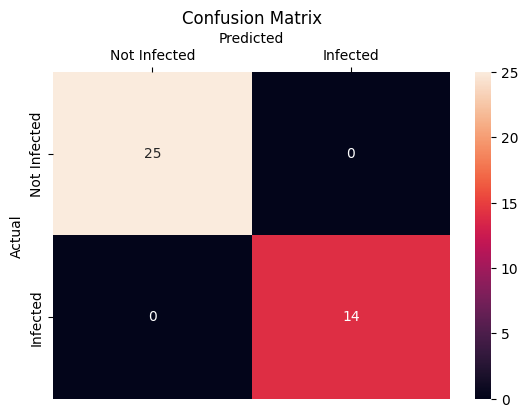

Accuracy: 100.000%
Precision: 100.000%
Sensitivity (Recall): 100.000%
F1-Score: 100.000%


In [9]:
actual=y_test
predicted=clf.predict(X_test)
cm=confusion_matrix(actual,predicted)

sns.heatmap(cm,annot=True,fmt='g',
           xticklabels=['Not Infected','Infected'],
           yticklabels=['Not Infected','Infected'])
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix")
plt.gca().xaxis.set_label_position('top') 
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.show()

# Extract values from the confusion matrix
TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]

# Calculate metrics
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP) if (TP + FP) != 0 else 0
recall = TP / (TP + FN) if (TP + FN) != 0 else 0  # Sensitivity
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

# Print the results
print(f"Accuracy: {accuracy*100:.3f}%")
print(f"Precision: {precision*100:.3f}%")
print(f"Sensitivity (Recall): {recall*100:.3f}%")
print(f"F1-Score: {f1_score*100:.3f}%")

In [10]:
print(classification_report(predicted,actual))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        14

    accuracy                           1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      1.00        39



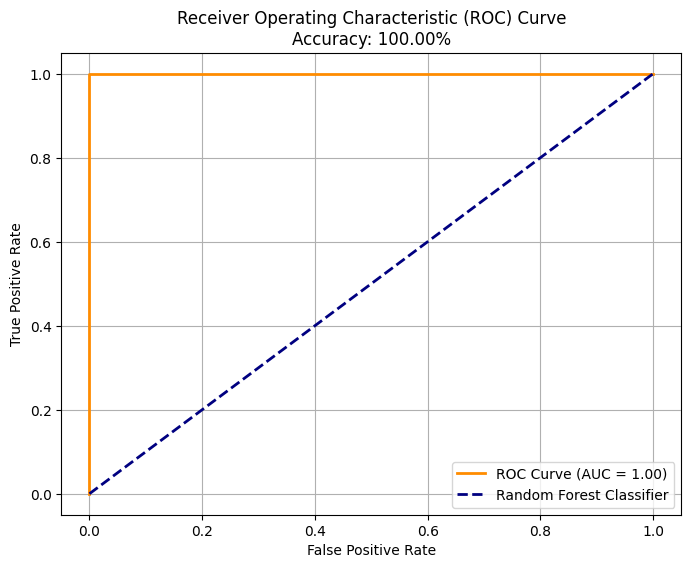

In [11]:
from sklearn.metrics import roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt

# Predict probabilities (only for the positive class)
y_prob = clf.predict_proba(X_test)[:, 1]

# Predict labels (for accuracy)
y_pred = clf.predict(X_test)

# Calculate ROC metrics
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve\nAccuracy: {:.2f}%'.format(accuracy * 100))
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [12]:
# import joblib 
# joblib.dump(clf,'./rf_model.h5')

In [13]:
import warnings
warnings.filterwarnings("ignore")
values=[[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.8,0.1,0.7]]
cond=clf.predict(values)
print(cond)

[0]


In [14]:
values=[[3.1,2.2,0.3,0.4,0.5,0.6,0.7,0.8,3.1,0.3,2.8]]
cond=clf.predict(values)
print(cond)

[1]


In [15]:
values=[[3.1,3,3,3,3,3,3,3,3.1,3,0.1]]
cond=clf.predict(values)
print(cond)

[1]


In [16]:
values=[[3.1,2.2,0.3,4.4,0.5,0.6,0.7,0.8,4.4,0.3,4.1]]
cond=clf.predict(values)
print(cond)

[1]


In [17]:
values=[[6.1,2.2,0.3,0.4,0.5,0.6,9.7,0.8,6.1,0.3,5.8]]
cond=clf.predict(values)
print(cond)

[1]


In [18]:
values=[[3,3,3,3,3,3,3,3,3,3,0]]
cond=clf.predict(values)
print(cond)

[1]


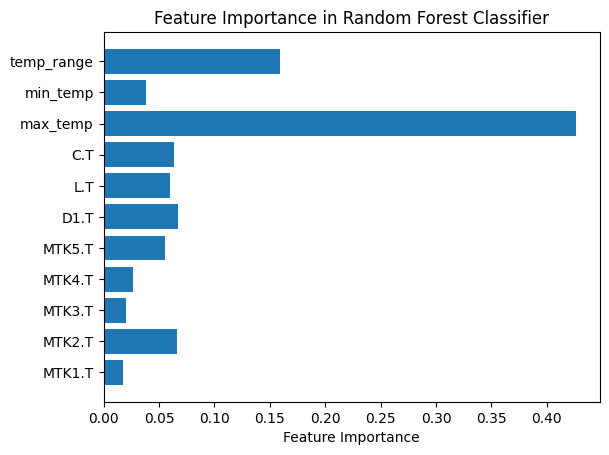

In [19]:
feature_importances = clf.feature_importances_

plt.barh(X.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Random Forest Classifier')
plt.show()

# Random Forest Classifier Hyperparameter Tuning Using Optuna

In [21]:
!pip install optuna

   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.1 MB ? eta -:--:--
   -------------- ------------------------- 0.8/2.1 MB 2.6 MB/s eta 0:00:01
   ----------------------------- ---------- 1.6/2.1 MB 3.5 MB/s eta 0:00:01
   ---------------------------------------- 2.1/2.1 MB 2.8 MB/s eta 0:00:00



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
def objective(trial):
    # Suggest values for hyperparameters
    n_estimators = trial.suggest_int("n_estimators", 10, 200, log=True)
    max_depth = trial.suggest_int("max_depth", 2, 32)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)

    # Create and fit random forest model
    model = RandomForestClassifier(
    n_estimators=n_estimators,
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf,
    random_state=42,
    )
    model.fit(X_train, y_train)

    # Make predictions and calculate RMSE
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Return MAE
    return mae

In [27]:
import optuna
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
study = optuna.create_study(direction="minimize")

# Run optimization process
study.optimize(objective, n_trials=20, show_progress_bar=True)

[I 2025-06-30 14:18:06,509] A new study created in memory with name: no-name-de74d543-60c0-45d9-9aa2-d13ebc250be7
Best trial: 0. Best value: 0:   0%|                                                             | 0/20 [00:00<?, ?it/s]

[I 2025-06-30 14:18:06,531] Trial 0 finished with value: 0.0 and parameters: {'n_estimators': 11, 'max_depth': 12, 'min_samples_split': 7, 'min_samples_leaf': 7}. Best is trial 0 with value: 0.0.


Best trial: 0. Best value: 0:  20%|██████████▌                                          | 4/20 [00:00<00:02,  7.71it/s]

[I 2025-06-30 14:18:06,746] Trial 1 finished with value: 0.0 and parameters: {'n_estimators': 150, 'max_depth': 9, 'min_samples_split': 6, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.0.
[I 2025-06-30 14:18:06,975] Trial 2 finished with value: 0.0 and parameters: {'n_estimators': 75, 'max_depth': 5, 'min_samples_split': 5, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.0.
[I 2025-06-30 14:18:07,053] Trial 3 finished with value: 0.02564102564102564 and parameters: {'n_estimators': 69, 'max_depth': 23, 'min_samples_split': 4, 'min_samples_leaf': 8}. Best is trial 0 with value: 0.0.


Best trial: 0. Best value: 0:  30%|███████████████▉                                     | 6/20 [00:00<00:01,  9.03it/s]

[I 2025-06-30 14:18:07,156] Trial 4 finished with value: 0.02564102564102564 and parameters: {'n_estimators': 75, 'max_depth': 14, 'min_samples_split': 4, 'min_samples_leaf': 9}. Best is trial 0 with value: 0.0.
[I 2025-06-30 14:18:07,242] Trial 5 finished with value: 0.02564102564102564 and parameters: {'n_estimators': 76, 'max_depth': 6, 'min_samples_split': 7, 'min_samples_leaf': 9}. Best is trial 0 with value: 0.0.


Best trial: 0. Best value: 0:  45%|███████████████████████▊                             | 9/20 [00:01<00:01,  8.09it/s]

[I 2025-06-30 14:18:07,466] Trial 6 finished with value: 0.0 and parameters: {'n_estimators': 186, 'max_depth': 30, 'min_samples_split': 6, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.0.
[I 2025-06-30 14:18:07,528] Trial 7 finished with value: 0.0 and parameters: {'n_estimators': 44, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.0.
[I 2025-06-30 14:18:07,582] Trial 8 finished with value: 0.02564102564102564 and parameters: {'n_estimators': 35, 'max_depth': 17, 'min_samples_split': 4, 'min_samples_leaf': 9}. Best is trial 0 with value: 0.0.
[I 2025-06-30 14:18:07,602] Trial 9 finished with value: 0.0 and parameters: {'n_estimators': 23, 'max_depth': 32, 'min_samples_split': 7, 'min_samples_leaf': 7}. Best is trial 0 with value: 0.0.


Best trial: 0. Best value: 0:  55%|████████████████████████████▌                       | 11/20 [00:01<00:00, 10.38it/s]

[I 2025-06-30 14:18:07,724] Trial 10 finished with value: 0.02564102564102564 and parameters: {'n_estimators': 10, 'max_depth': 23, 'min_samples_split': 10, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.0.


Best trial: 0. Best value: 0:  65%|█████████████████████████████████▊                  | 13/20 [00:01<00:00,  9.32it/s]

[I 2025-06-30 14:18:07,951] Trial 11 finished with value: 0.0 and parameters: {'n_estimators': 188, 'max_depth': 11, 'min_samples_split': 9, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.0.
[I 2025-06-30 14:18:07,989] Trial 12 finished with value: 0.02564102564102564 and parameters: {'n_estimators': 10, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.0.
[I 2025-06-30 14:18:08,040] Trial 13 finished with value: 0.0 and parameters: {'n_estimators': 18, 'max_depth': 10, 'min_samples_split': 8, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.0.


Best trial: 0. Best value: 0:  85%|████████████████████████████████████████████▏       | 17/20 [00:01<00:00, 11.12it/s]

[I 2025-06-30 14:18:08,178] Trial 14 finished with value: 0.0 and parameters: {'n_estimators': 118, 'max_depth': 20, 'min_samples_split': 8, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.0.
[I 2025-06-30 14:18:08,232] Trial 15 finished with value: 0.02564102564102564 and parameters: {'n_estimators': 17, 'max_depth': 2, 'min_samples_split': 6, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.0.
[I 2025-06-30 14:18:08,295] Trial 16 finished with value: 0.0 and parameters: {'n_estimators': 36, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 7}. Best is trial 0 with value: 0.0.


Best trial: 0. Best value: 0: 100%|████████████████████████████████████████████████████| 20/20 [00:02<00:00,  9.56it/s]

[I 2025-06-30 14:18:08,454] Trial 17 finished with value: 0.0 and parameters: {'n_estimators': 123, 'max_depth': 8, 'min_samples_split': 7, 'min_samples_leaf': 7}. Best is trial 0 with value: 0.0.
[I 2025-06-30 14:18:08,537] Trial 18 finished with value: 0.02564102564102564 and parameters: {'n_estimators': 51, 'max_depth': 16, 'min_samples_split': 10, 'min_samples_leaf': 10}. Best is trial 0 with value: 0.0.
[I 2025-06-30 14:18:08,590] Trial 19 finished with value: 0.0 and parameters: {'n_estimators': 26, 'max_depth': 20, 'min_samples_split': 8, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.0.


In [28]:
print("Best trial:", study.best_trial)
print("Best hyperparameters:", study.best_params)

Best trial: FrozenTrial(number=0, state=TrialState.COMPLETE, values=[0.0], datetime_start=datetime.datetime(2025, 6, 30, 14, 18, 6, 512590), datetime_complete=datetime.datetime(2025, 6, 30, 14, 18, 6, 531912), params={'n_estimators': 11, 'max_depth': 12, 'min_samples_split': 7, 'min_samples_leaf': 7}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=200, log=True, low=10, step=1), 'max_depth': IntDistribution(high=32, log=False, low=2, step=1), 'min_samples_split': IntDistribution(high=10, log=False, low=2, step=1), 'min_samples_leaf': IntDistribution(high=10, log=False, low=1, step=1)}, trial_id=0, value=None)
Best hyperparameters: {'n_estimators': 11, 'max_depth': 12, 'min_samples_split': 7, 'min_samples_leaf': 7}


In [29]:
model=RandomForestClassifier(n_estimators=11, max_depth=12,  min_samples_split= 7, min_samples_leaf = 7)
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=12, min_samples_leaf=7, min_samples_split=7,
                       n_estimators=11)

In [30]:
print(f'Testing Accuracy - : {model.score(X_test,y_test)*100:.3f}%')

Testing Accuracy - : 100.000%


In [31]:
print(f"Training Accuracy:{model.score(X_train,y_train)*100:.3f}%")

Training Accuracy:100.000%


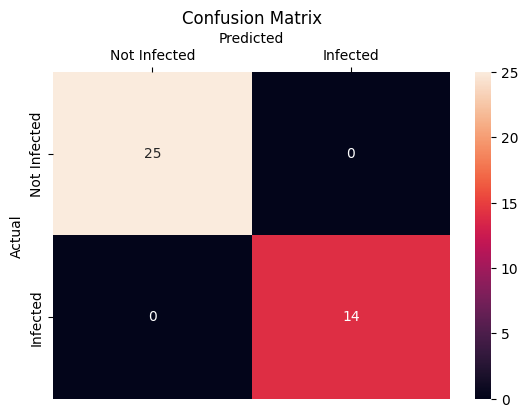

Accuracy: 100.000%
Precision: 100.000%
Sensitivity (Recall): 100.000%
F1-Score: 100.000%


In [33]:
actual=y_test
predicted=model.predict(X_test)
cm=confusion_matrix(actual,predicted)

sns.heatmap(cm,annot=True,fmt='g',
           xticklabels=['Not Infected','Infected'],
           yticklabels=['Not Infected','Infected'])
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix")
plt.gca().xaxis.set_label_position('top') 
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.show()

# Extract values from the confusion matrix
TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]

# Calculate metrics
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP) if (TP + FP) != 0 else 0
recall = TP / (TP + FN) if (TP + FN) != 0 else 0  # Sensitivity
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

# Print the results
print(f"Accuracy: {accuracy*100:.3f}%")
print(f"Precision: {precision*100:.3f}%")
print(f"Sensitivity (Recall): {recall*100:.3f}%")
print(f"F1-Score: {f1_score*100:.3f}%")

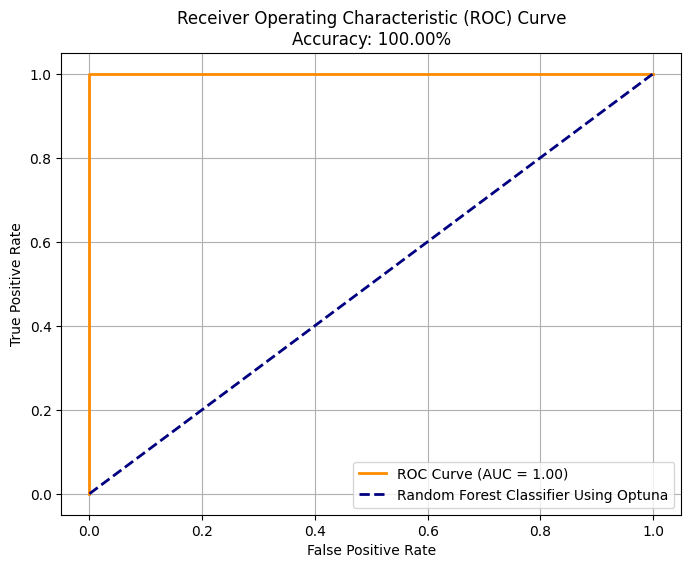

In [35]:
from sklearn.metrics import roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt

# Predict probabilities (only for the positive class)
y_prob = model.predict_proba(X_test)[:, 1]

# Predict labels (for accuracy)
y_pred = model.predict(X_test)

# Calculate ROC metrics
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Forest Classifier Using Optuna')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve\nAccuracy: {:.2f}%'.format(accuracy * 100))
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [36]:
import warnings
warnings.filterwarnings("ignore")
values=[[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.8,0.1,0.7]]
cond=model.predict(values)
print(cond)

[0]


In [37]:
values=[[3.1,3,3,3,3,3,3,3,3.1,3,0.1]]
cond=model.predict(values)
print(cond)

[1]


In [38]:
values=[[2.0,2.0,2.3,2.4,2.5,2.6,0.7,0.8,2.6,0.7,1.9]]
cond=model.predict(values)
print(cond)

[0]


In [39]:
values=[[6.1,2.2,0.3,0.4,0.5,0.6,9.7,0.8,6.1,0.3,5.8]]
cond=model.predict(values)
print(cond)

[1]


In [40]:
values=[[3.5,0.2,2.3,2.4,2.5,1.6,2.7,0.8,3.5,0.2,3.3]]
cond=model.predict(values)
print(cond)

[1]


In [41]:
values=[[3.1,2.2,0.3,0.4,0.5,0.6,0.7,0.8,3.1,0.3,2.8]]
cond=model.predict(values)
print(cond)

[1]


In [42]:
values=[[3.1,3,3,3,3,3,3,3,3.1,3,0.1]]
cond=model.predict(values)
print(cond)

[1]


In [43]:
values=[[3,3,3,3,3,3,3,3,3,3,0]]
cond=model.predict(values)
print(cond)

[1]


In [44]:
values=[[0,0.1,0,0.3,0.4,0,0,0,0.4,0.1,0.3]]
cond=model.predict(values)
print(cond)

[0]


In [45]:
values=[[0,0,0,0,0,0,0,0,0,0,0]]
cond=model.predict(values)
print(cond)

[0]


In [46]:
values=[[0.704690, 1.595115	,1.218438, 0.859128, 1.165247, 0.722619 , 1.235193 ,3.400332,3.400332, 0.704690 , 2.695642]]
cond=model.predict(values)
print(cond)

[1]


In [47]:
values=[[0.855601,	1.885228,	0.312482,	0.416831,	1.506368,	0.580588,	1.454307,	3.5,	3.5,	0.312482, 3.187518]]
cond=model.predict(values)
print(cond)

[1]


In [48]:
values=[[4.149849,	5.530390,	4.016367,	3.915858,	2.414940,	3.060105,	0.416193,	4.773635,	5.530390,	0.416193,	5.114198	]]
cond=model.predict(values)
print(cond)

[1]


In [49]:
values=[[0.414943,	1.192581,	1.365798,	0.995435,	2.109256,	0.506431,	2.456453,	2.918048,	2.918048,	0.414943,	2.503104	]]
cond=model.predict(values)
print(cond)

[0]


In [51]:
def predict_and_plot(patient, model, values):
    if(patient == 'normal'):
        prediction = model.predict(values)
        if(prediction == 0):
            print("Patient is Normal")

        if(prediction == 0 and max(values[0]) >= 3):
            print("Model made wrong prediction....Patient is non-diabetic but has other disease/foot ulcer")
            x = ['MTK1.T', 'MTK2.T', 'MTK3.T', 'MTK4.T', 'MTK5.T', 'D1.T', 'L.T', 'C.T']
            y = values[0][:-3]

            high_temp_features = [(feature, val) for feature, val in zip(x, y) if val >= 3]
            plt.figure(figsize=(8, 6))
            plt.plot(x, y, marker='o')
            plt.title("Temperature difference sensor readings")
            plt.xlabel("Sensor")
            plt.ylabel("Value")
            plt.grid(True)

            for feature, val in high_temp_features:
                plt.annotate(
                    f"{val}",
                    xy=(feature, val),
                    xytext=(feature, val + 0.2),
                    arrowprops=dict(facecolor='red', shrink=0.05),
                    ha='center', color='red'
                )
            plt.show()

            print(f"Patient is non-diabetic but might develop ulcer/infection on the following regions:")
            for feature, val in high_temp_features:
                print(f" {feature}: temperature difference = {val}")
        else:
            # Otherwise, predicted correctly or other conditions
            x = ['MTK1.T', 'MTK2.T', 'MTK3.T', 'MTK4.T', 'MTK5.T', 'D1.T', 'L.T', 'C.T']
            y = values[0][:-3]

            high_temp_features = [(feature, val) for feature, val in zip(x, y) if val >= 3]
            plt.figure(figsize=(8, 6))
            plt.plot(range(len(x)), y, marker='o')
            plt.xticks(ticks=range(len(x)), labels=x)
            plt.title("Temperature difference sensor readings")
            plt.xlabel("Sensor")
            plt.ylabel("Value")
            plt.grid(True)

            for feature, val in high_temp_features:
                idx = x.index(feature)
                plt.annotate(
                    f"{val}",
                    xy=(idx, val),
                    xytext=(idx, val + 0.2),
                    arrowprops=dict(facecolor='red', shrink=0.05),
                    ha='center', color='red'
                )
            plt.show()

            print(f"Patient is non-diabetic but might develop ulcer/infection on the following regions:")
            for feature, val in high_temp_features:
                print(f" {feature}: temperature difference = {val}")

    else:
        prediction = model.predict(values)
        if(prediction == 0):
            print("Patient is Diabetic without foot ulcer.")

        if(prediction == 0 and max(values[0]) >= 3):
            print("Model made wrong prediction....Patient has diabetic foot ulcer")
            x = ['MTK1.T', 'MTK2.T', 'MTK3.T', 'MTK4.T', 'MTK5.T', 'D1.T', 'L.T', 'C.T']
            y = values[0][:-3]

            high_temp_features = [(feature, val) for feature, val in zip(x, y) if val >= 3]
            plt.figure(figsize=(8, 6))
            plt.plot(range(len(x)), y, marker='o')
            plt.xticks(ticks=range(len(x)), labels=x)
            plt.title("Temperature difference sensor readings")
            plt.xlabel("Sensor")
            plt.ylabel("Value")
            plt.grid(True)

            for feature, val in high_temp_features:
                idx = x.index(feature)
                plt.annotate(
                    f"{val}",
                    xy=(idx, val),
                    xytext=(idx, val + 0.2),
                    arrowprops=dict(facecolor='red', shrink=0.05),
                    ha='center', color='red'
                )
            plt.show()

            print(f"Patient might develop diabetic foot ulcer on the following regions:")
            for feature, val in high_temp_features:
                if(val >= 3 and val <= 4):
                    print(f" {feature}: temperature difference = {val} and ulcer type: chronic")
                elif(val >= 4 and val <= 5):
                    print(f" {feature}: temperature difference = {val} and ulcer type: mild")
                else:
                    print(f" {feature}: temperature difference = {val} and ulcer type: severe Need Attention!!")
        else:
            x = ['MTK1.T', 'MTK2.T', 'MTK3.T', 'MTK4.T', 'MTK5.T', 'D1.T', 'L.T', 'C.T']
            y = values[0][:-3]

            high_temp_features = [(feature, val) for feature, val in zip(x, y) if val >= 3]
            plt.figure(figsize=(8, 6))
            plt.plot(range(len(x)), y, marker='o')
            plt.xticks(ticks=range(len(x)), labels=x)
            plt.xlabel("Sensor")
            plt.ylabel("Value")
            plt.grid(True)

            for feature, val in high_temp_features:
                idx = x.index(feature)
                plt.annotate(
                    f"{val}",
                    xy=(idx, val),
                    xytext=(idx, val + 0.2),
                    arrowprops=dict(facecolor='red', shrink=0.05),
                    ha='center', color='red'
                )
            plt.show()

            print(f"Patient might develop diabetic foot ulcer on the following regions:")
            for feature, val in high_temp_features:
                if(val >= 3 and val <= 4):
                    print(f" {feature}: temperature difference = {val} and ulcer type: chronic")
                elif(val >= 4 and val <= 5):
                    print(f" {feature}: temperature difference = {val} and ulcer type: mild")
                else:
                    print(f" {feature}: temperature difference = {val} and ulcer type: severe Need Attention!!")


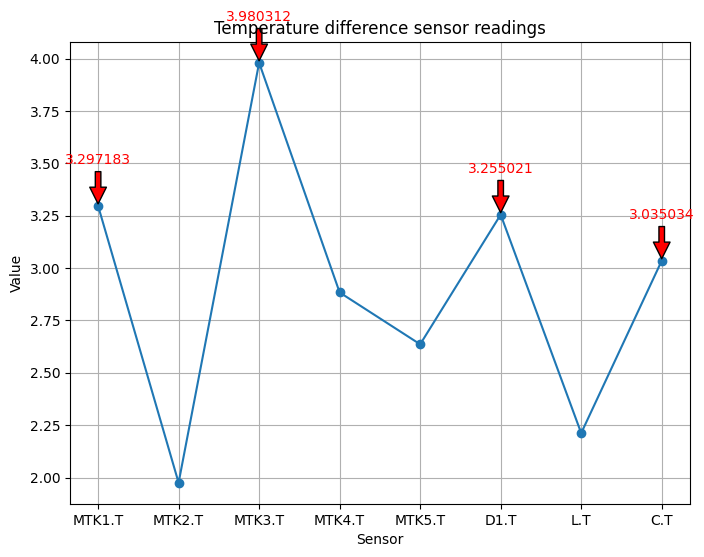

Patient is non-diabetic but might develop ulcer/infection on the following regions:
 MTK1.T: temperature difference = 3.297183
 MTK3.T: temperature difference = 3.980312
 D1.T: temperature difference = 3.255021
 C.T: temperature difference = 3.035034


In [53]:
values = [[3.297183,1.975242,3.980312,2.883603,2.636066,3.255021,2.212102,3.035034,3.980312,1.975242,2.700533]]
cond = predict_and_plot('normal',model,values)

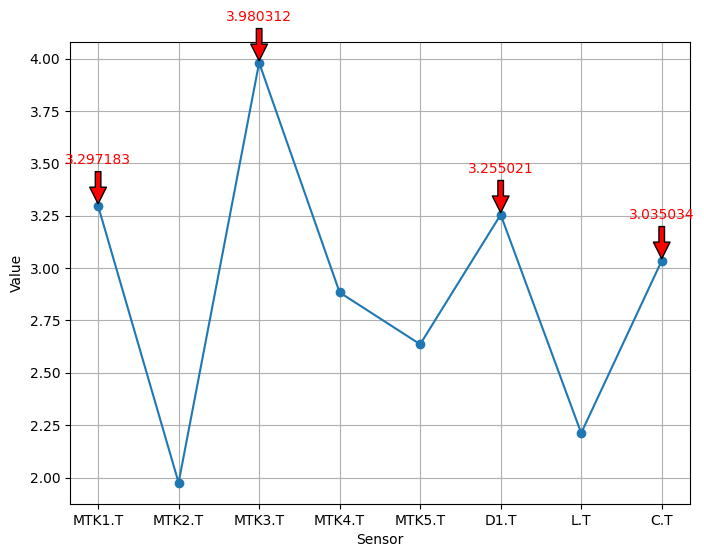

Patient might develop diabetic foot ulcer on the following regions:
 MTK1.T: temperature difference = 3.297183 and ulcer type: chronic
 MTK3.T: temperature difference = 3.980312 and ulcer type: chronic
 D1.T: temperature difference = 3.255021 and ulcer type: chronic
 C.T: temperature difference = 3.035034 and ulcer type: chronic


In [54]:
values = [[3.297183,1.975242,3.980312,2.883603,2.636066,3.255021,2.212102,3.035034,3.980312,1.975242,2.700533]]
cond = predict_and_plot('diabetic',model,values)

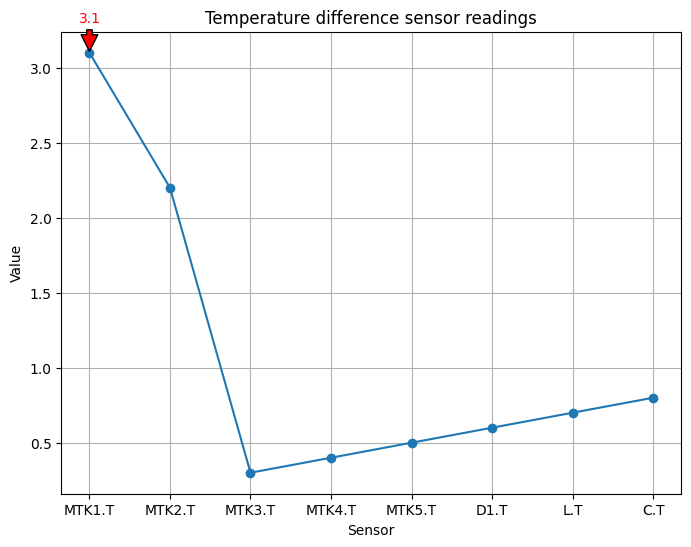

Patient is non-diabetic but might develop ulcer/infection on the following regions:
 MTK1.T: temperature difference = 3.1


In [55]:
values=[[3.1,2.2,0.3,0.4,0.5,0.6,0.7,0.8,3.1,0.3,2.8]]
cond = predict_and_plot('normal',model,values)

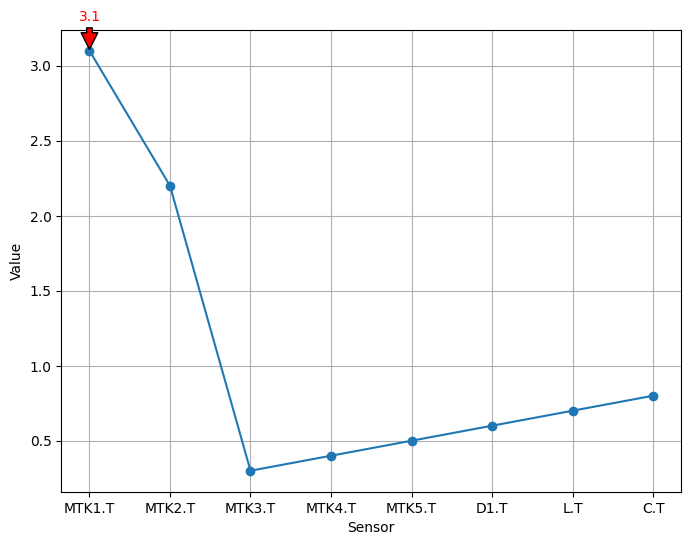

Patient might develop diabetic foot ulcer on the following regions:
 MTK1.T: temperature difference = 3.1 and ulcer type: chronic


In [56]:
values=[[3.1,2.2,0.3,0.4,0.5,0.6,0.7,0.8,3.1,0.3,2.8]]
cond = predict_and_plot('diabetic',model,values)

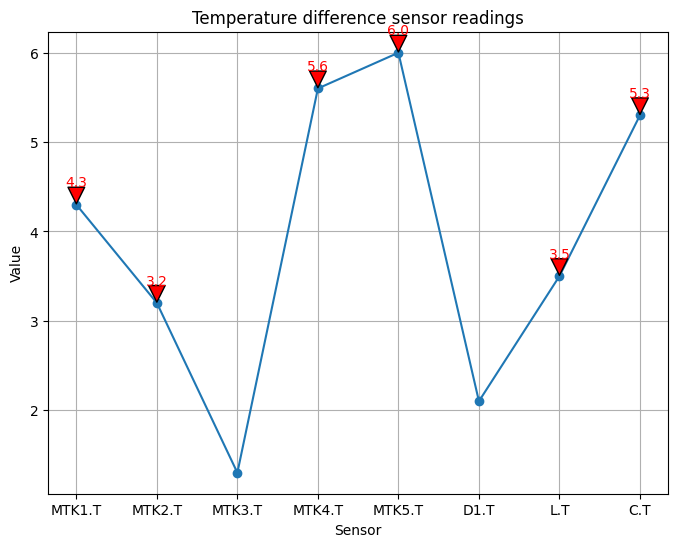

Patient is non-diabetic but might develop ulcer/infection on the following regions:
 MTK1.T: temperature difference = 4.3
 MTK2.T: temperature difference = 3.2
 MTK4.T: temperature difference = 5.6
 MTK5.T: temperature difference = 6.0
 L.T: temperature difference = 3.5
 C.T: temperature difference = 5.3


In [57]:
values = [[4.3,3.2,1.3,5.6,6.0,2.1,3.5,5.3,6.0,1.3,4.7]]
cond = predict_and_plot('normal',model,values)

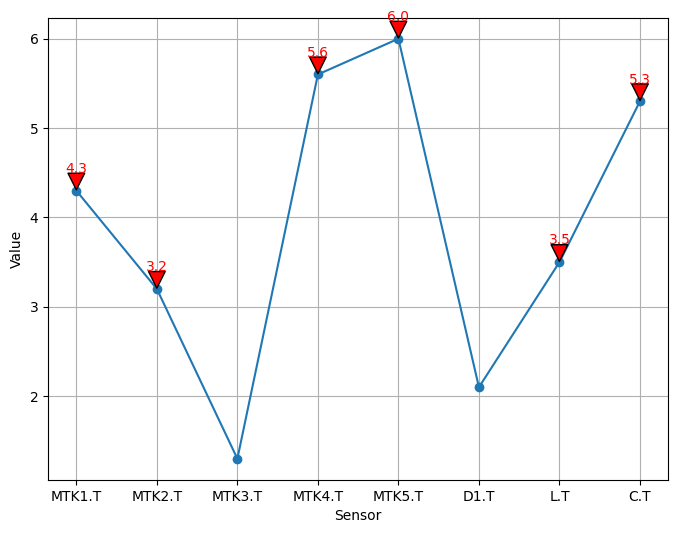

Patient might develop diabetic foot ulcer on the following regions:
 MTK1.T: temperature difference = 4.3 and ulcer type: mild
 MTK2.T: temperature difference = 3.2 and ulcer type: chronic
 MTK4.T: temperature difference = 5.6 and ulcer type: severe Need Attention!!
 MTK5.T: temperature difference = 6.0 and ulcer type: severe Need Attention!!
 L.T: temperature difference = 3.5 and ulcer type: chronic
 C.T: temperature difference = 5.3 and ulcer type: severe Need Attention!!


In [58]:
values = [[4.3,3.2,1.3,5.6,6.0,2.1,3.5,5.3,6.0,1.3,4.7]]
cond = predict_and_plot('diabetic',model,values)